# Brownian Motion and Random Walks

I did an exercise in random walks for a class a very long time ago, but I found the graphics always fascinating and the math behind it very fun!


Einstein in 1905 related the motion of large particles to the motion of individual atoms. The resulting equation is the Einstin diffusion relation in 3 dimensions:

$$
\langle(r(t)-r(0))^2\rangle = 6Dt
$$

where $r(t)$ is the position of a particle at time $t$, $D$ is the diffusion coefficient, and the angle brackets denote an average over an ensemble of measurements.

Here I'll show that for the $1D$ case it is $\langle(r(t)-r(0))^2\rangle = 2Dt $ and for the $2D$ case it is $\langle(r(t)-r(0))^2\rangle = 4Dt$

*It's important to know that there is a diffusion constant of $D=1/2$ for the following cases


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

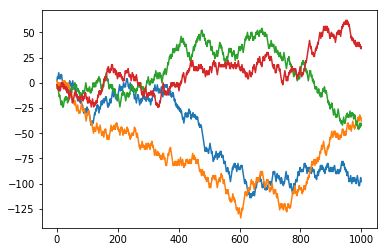

In [19]:
## 1-D case 
for n in range(4):
    x = 0
    x_array = []
    for t in range(0,1000+1):
        a = np.random.randint(0,2)
        if(a == 0):
            x -= 2
        else:
            x += 2
        x_array.append(x)
        t = np.arange(0,len(x_array))
    plt.plot(t,x_array)

[[   0.       0.   ]
 [ 100.      98.16 ]
 [ 200.     188.924]
 [ 300.     296.38 ]
 [ 400.     365.716]
 [ 500.     500.724]
 [ 600.     562.868]
 [ 700.     636.2  ]
 [ 800.     783.872]
 [ 900.     891.98 ]
 [1000.    1066.244]]
1.0152850909090911  Estimated slope of the equation


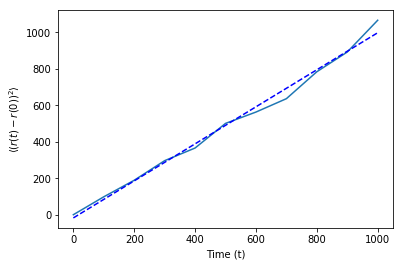

In [20]:
max_t = 1000
max_traj = 1000
#final_pos = []
dt = 100
# Get r(t) at fixed dts up to max_t
time_range = np.arange(0,1000+dt,dt)
time_pull = np.zeros((len(time_range),2))

for time in time_range:
    final_pos = []
    for n in range(max_traj):
        x = 0
        x_array = []
        for t in range(0,time):
            a = np.random.randint(0,2)
            if(a == 0):
                x -= 1
            else:
                x += 1
            #x_array.append(x)
        final_pos.append(x**2)
        avg_final_pos = np.mean(final_pos)
    time_pull[int(time/dt),0] = time
    time_pull[int(time/dt),1] = avg_final_pos

slope, intercept, r_value, p_value, std_err = stats.linregress(time_pull)
plt.plot(time_pull[:,0],time_pull[:,1])
plt.plot(time_range,intercept+time_range*slope,'--b')
plt.xlabel("Time (t)")
plt.ylabel(r'$\langle(r(t)-r(0))^2\rangle$')
print(time_pull)
print(slope,' Estimated slope of the equation')

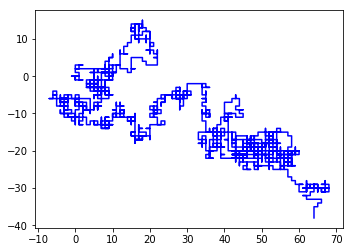

In [24]:
#paired x y control
# This one is my favorite graphically
x_array = [0]
y_array = [0]
x = 0
y = 0

for t in range(2000):
    a = np.random.randint(0,4)

    if a == 0:
        x -= 1
    elif a == 1:
        x += 1
    elif a == 2:
        y -= 1
    else:
        y += 1
    x_array.append(x)
    y_array.append(y)
    
plt.plot(x_array,y_array,'-b')
plt.axes().set_aspect('equal')

[[   0.       0.   ]
 [ 100.     100.816]
 [ 200.     211.108]
 [ 300.     301.16 ]
 [ 400.     409.734]
 [ 500.     492.704]
 [ 600.     609.076]
 [ 700.     688.644]
 [ 800.     805.672]
 [ 900.     878.184]
 [1000.    1014.946]]
0.9947458181818182  Estimated slope of the equation


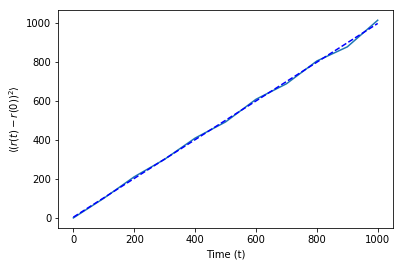

In [26]:
#2d Case, only move 1 X or Y step at a time.
max_t = 1000
max_traj = 1000
#final_pos = []
dt = 100

time_range = np.arange(0,1000+dt,dt)
time_pull = np.zeros((len(time_range),2))

for time in time_range:
    final_pos = []
    for n in range(max_traj):
        x = 0
        y = 0
        for t in range(0,time):
            a = np.random.randint(0,4)
            if a == 0:
                x -= 1
            elif a == 1:
                x += 1
            elif a == 2:
                y -= 1
            else:
                y += 1
            #x_array.append(x)
        final_pos.append(x**2+y**2)
        avg_final_pos = np.mean(final_pos)
    time_pull[int(time/dt),0] = time
    time_pull[int(time/dt),1] = avg_final_pos

slope, intercept, r_value, p_value, std_err = stats.linregress(time_pull)
plt.plot(time_pull[:,0],time_pull[:,1])
plt.plot(time_range,intercept+time_range*slope,'--b')
plt.xlabel("Time (t)")
plt.ylabel(r'$\langle(r(t)-r(0))^2\rangle$')
print(time_pull)
# The slope is the same this time, because we are moving one direction at a time. If we independently treat X and Y then we increase our dimensionality!
print(slope,' Estimated slope of the equation')

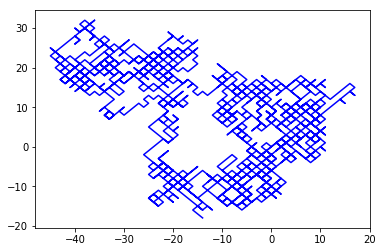

In [27]:
# independent X Y control  
x_array = [0]
y_array = [0]
x = 0
y = 0

for t in range(2000):
    a = np.random.randint(0,2)
    b = np.random.randint(0,2)
    if a == 0:
        x -= 1
    else:
        x += 1
    if b == 0:
        y -= 1
    else:
        y += 1
    x_array.append(x)
    y_array.append(y)
    
plt.plot(x_array,y_array,'-b')

[   0  100  200  300  400  500  600  700  800  900 1000]
[[   0.       0.   ]
 [ 100.     203.456]
 [ 200.     388.732]
 [ 300.     609.348]
 [ 400.     765.652]
 [ 500.     988.728]
 [ 600.    1184.804]
 [ 700.    1425.692]
 [ 800.    1610.676]
 [ 900.    1814.324]
 [1000.    1952.2  ]]
1.9929221818181817  Estimated slope of the equation


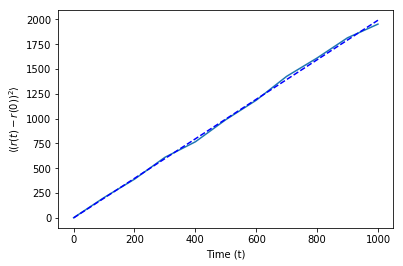

In [30]:
#2d Case Independent random process in X and Y axis.

max_t = 1000
max_traj = 1000
#final_pos = []
dt = 100

time_range = np.arange(0,1000+dt,dt)
time_pull = np.zeros((len(time_range),2))
print(time_range)

for time in time_range:
    final_pos = []
    for n in range(max_traj):
        x = 0
        y = 0
        for t in range(0,time):
            a = np.random.randint(0,2)
            b = np.random.randint(0,2)
            if a == 0:
                x -= 1
            else:
                x += 1
            if b == 0:
                y -= 1
            else:
                y += 1
            #x_array.append(x)
        final_pos.append(x**2+y**2)
        avg_final_pos = np.mean(final_pos)
    time_pull[int(time/dt),0] = time
    time_pull[int(time/dt),1] = avg_final_pos

slope, intercept, r_value, p_value, std_err = stats.linregress(time_pull)
plt.plot(time_pull[:,0],time_pull[:,1])
plt.plot(time_range,intercept+time_range*slope,'--b')
plt.xlabel("Time (t)")
plt.ylabel(r'$\langle(r(t)-r(0))^2\rangle$')
print(time_pull)
# Note the the double slope as the previous condition!
print(slope,' Estimated slope of the equation')

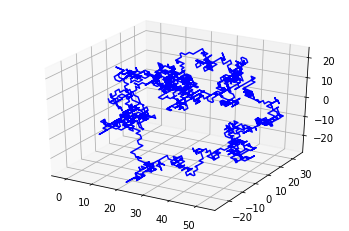

In [37]:
# independent X Y control in 3D
from mpl_toolkits.mplot3d import Axes3D 

x_array = [0]
y_array = [0]
z_array = [0]
x = 0
y = 0
z = 0
for t in range(2000):
    a = np.random.randint(0,2)
    b = np.random.randint(0,2)
    c = np.random.randint(0,2)
    if a == 0:
        x -= 1
    else:
        x += 1
    if b == 0:
        y -= 1
    else:
        y += 1
    if c == 0:
        z -= 1
    else:
        z += 1
    x_array.append(x)
    y_array.append(y)
    z_array.append(z)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_array,y_array,z_array,'-b')

[   0  100  200  300  400  500  600  700  800  900 1000]
[[   0.       0.   ]
 [ 100.     300.632]
 [ 200.     589.72 ]
 [ 300.     915.896]
 [ 400.    1166.84 ]
 [ 500.    1509.768]
 [ 600.    1830.712]
 [ 700.    2022.108]
 [ 800.    2362.524]
 [ 900.    2637.332]
 [1000.    3121.624]]
3.013602545454545  Estimated slope of the equation


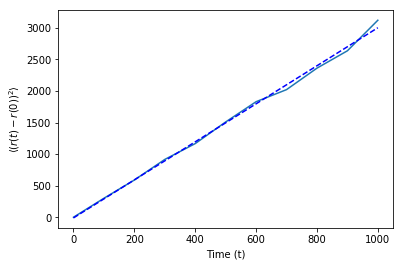

In [39]:
#3D slope determining
max_t = 1000
max_traj = 1000
#final_pos = []
dt = 100

time_range = np.arange(0,1000+dt,dt)
time_pull = np.zeros((len(time_range),2))


for time in time_range:
    final_pos = []
    for n in range(max_traj):
        x = 0
        y = 0
        z = 0
        for t in range(0,time):
            a = np.random.randint(0,2)
            b = np.random.randint(0,2)
            c = np.random.randint(0,2)
            if a == 0:
                x -= 1
            else:
                x += 1
            if b == 0:
                y -= 1
            else:
                y += 1
            if c == 0:
                z -= 1
            else:
                z += 1
            #x_array.append(x)
        final_pos.append(x**2+y**2+z**2)
        avg_final_pos = np.mean(final_pos)
    time_pull[int(time/dt),0] = time
    time_pull[int(time/dt),1] = avg_final_pos

slope, intercept, r_value, p_value, std_err = stats.linregress(time_pull)
plt.plot(time_pull[:,0],time_pull[:,1])
plt.plot(time_range,intercept+time_range*slope,'--b')
plt.xlabel("Time (t)")
plt.ylabel(r'$\langle(r(t)-r(0))^2\rangle$')
print(time_pull)
# Note the the triple slope as the previous condition!
print(slope,' Estimated slope of the equation')